## Visualize Summary of data sources

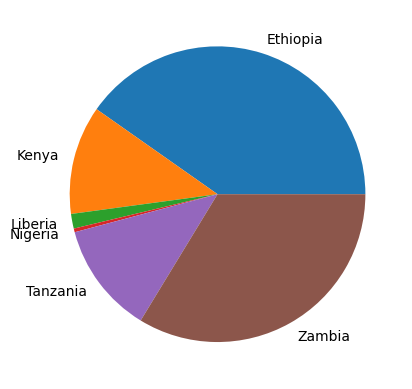

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
src_path = "./playground/data/esmap_lsms-tanzania_with_source.csv"
df = pd.read_csv(src_path)

source_lens = {}

for source, src_df in df.groupby("source"):

    source_lens[source.capitalize()] = len(src_df)
    
    
plt.pie(source_lens.values(), labels=source_lens.keys())
plt.savefig("./assets/datasource_distributions_pie.png")

## Appliances and Distribution

### Missing Applicances

In [2]:


appliance_missing_count = {}

PRESENCE_LIST = [
    'Presence_refrigerator/freezer', 'Presence_iron', 'Presence_fan',
    'Presence_DVD_player', 'Presence_radio/stereo',
    'Presence_phone_charger',
    'Presence_TV'
]


DRIVERS_LIST = ['Years_of_HHH_in_community',
                'Dwelling_quality_index', 'Hours_available_electricity',
                'Measurement_age', 'Monthly_expenditure', 'Number_of_rooms',
                'Climate_zone_lev_1', 'Climate_zone_lev_2',
                'Age_HHH', 'HH_with_home_business',
                'Education_level_HHH', 'Socio_status_HHH', 'Number_adults',
                'Ownership_motorized_vehicle', 'Ownership_small_livestock',
                'Ownership_large_livestock', 'Clean_fuel', 'Tariff_payment_frequency'
                ]
len_df  =len(df)
for col in PRESENCE_LIST:
    nan_df = df[df[col].isna()]
    appliance_missing_count[col] = f"{(len(nan_df) / len_df) *100:.2f}"
    

# plt.bar(appliance_missing_count.keys(), appliance_missing_count.values())
print(appliance_missing_count)

{'Presence_refrigerator/freezer': '7.41', 'Presence_iron': '18.44', 'Presence_fan': '7.41', 'Presence_DVD_player': '7.41', 'Presence_radio/stereo': '7.39', 'Presence_phone_charger': '58.69', 'Presence_TV': '47.66'}


### Most Common Appliances

In [3]:
common_appliances = {}
for col in PRESENCE_LIST:
    count_df = df[df[col] == 1]
    common_appliances[col] = f"{len(count_df) / len_df * 100:.2f}"
    
print(common_appliances)

{'Presence_refrigerator/freezer': '12.79', 'Presence_iron': '19.13', 'Presence_fan': '22.94', 'Presence_DVD_player': '10.80', 'Presence_radio/stereo': '22.00', 'Presence_phone_charger': '19.41', 'Presence_TV': '17.79'}


## Appliances per source

In [4]:
groups = df.groupby("source")

source_appliance_count = {}
sources = [s.capitalize() for s, _ in groups]

print(f"| Appliance | {' | '.join(sources)} |")

print(f"| --- | {' | '.join('-' * len(i) for i in sources)} |")

for col in PRESENCE_LIST:
    s = "| " + col+ " | "
    for src, src_df in groups:
        # s += f"{len(src_df[src_df[col] == 1]) / len(src_df) * 100:.2f} % | "
        owned_df = src_df[src_df[col] == 1]
        len_df = len(src_df)
        s += f"{len(owned_df) / len_df * 100:.2f} % | "
        
    print(s)
        

| Appliance | Ethiopia | Kenya | Liberia | Nigeria | Tanzania | Zambia |
| --- | -------- | ----- | ------- | ------- | -------- | ------ |
| Presence_refrigerator/freezer | 3.11 % | 4.00 % | 25.00 % | 39.53 % | 13.12 % | 26.44 % | 
| Presence_iron | 22.37 % | 7.22 % | 13.37 % | 44.19 % | 1.23 % | 25.89 % | 
| Presence_fan | 37.20 % | 0.31 % | 54.07 % | 65.12 % | 12.36 % | 15.73 % | 
| Presence_DVD_player | 0.35 % | 9.58 % | 18.60 % | 58.14 % | 21.87 % | 18.80 % | 
| Presence_radio/stereo | 0.09 % | 24.18 % | 55.23 % | 44.19 % | 52.42 % | 34.58 % | 
| Presence_phone_charger | 0.00 % | 23.63 % | 20.35 % | 67.44 % | 7.21 % | 44.88 % | 
| Presence_TV | 0.00 % | 20.25 % | 58.72 % | 62.79 % | 34.15 % | 29.79 % | 


## Missing  Appliances per source

In [5]:
groups = df.groupby("source")

source_appliance_count = {}
sources = [s.capitalize() for s, _ in groups]

print(f"| Appliance | {' | '.join(sources)} |")

print(f"| --- | {' | '.join('-' * len(i) for i in sources)} |")

for col in PRESENCE_LIST:
    s = "| " + col+ " | "
    for src, src_df in groups:
        # s += f"{len(src_df[src_df[col] == 1]) / len(src_df) * 100:.2f} % | "
        owned_df = src_df[src_df[col].isna()]
        len_df = len(src_df)
        s += f"{len(owned_df) / len_df * 100:.2f} % | "
        
    print(s)
        

| Appliance | Ethiopia | Kenya | Liberia | Nigeria | Tanzania | Zambia |
| --- | -------- | ----- | ------- | ------- | -------- | ------ |
| Presence_refrigerator/freezer | 0.00 % | 54.55 % | 0.00 % | 0.00 % | 0.15 % | 2.69 % | 
| Presence_iron | 0.00 % | 54.55 % | 0.00 % | 0.00 % | 90.87 % | 2.69 % | 
| Presence_fan | 0.00 % | 54.55 % | 0.00 % | 0.00 % | 0.15 % | 2.69 % | 
| Presence_DVD_player | 0.00 % | 54.55 % | 0.00 % | 0.00 % | 0.15 % | 2.69 % | 
| Presence_radio/stereo | 0.00 % | 54.55 % | 0.00 % | 0.00 % | 0.00 % | 2.69 % | 
| Presence_phone_charger | 100.00 % | 54.55 % | 0.00 % | 0.00 % | 90.87 % | 2.69 % | 
| Presence_TV | 100.00 % | 54.55 % | 0.00 % | 0.00 % | 0.15 % | 2.69 % | 


In [6]:
100 - 54.55

45.45

In [7]:
print("Ownership")
for col in PRESENCE_LIST: 
    owned_df = df[df[col]== 1]
    len_df = len(df)
    print(f"{len(owned_df) / len_df * 100:.2f} %")
    
    
    
print ("Missing")
for col in PRESENCE_LIST: 
    miss_df = df[df[col].isna()]
    len_df = len(df)
    print(f"{len(miss_df) / len_df * 100:.2f} %")
    
        

Ownership
12.79 %
19.13 %
22.94 %
10.80 %
22.00 %
19.41 %
17.79 %
Missing
7.41 %
18.44 %
7.41 %
7.41 %
7.39 %
58.69 %
47.66 %


## Missing Drivers

In [10]:
groups = df.groupby("source")

source_appliance_count = {}
sources = [s.capitalize() for s, _ in groups]

print(f"| Appliance | {' | '.join(sources)} | Total |")

print(f"| --- | {' | '.join('-' * len(i) for i in sources)} | ------ |")

total_df_len = len(df)
for col in DRIVERS_LIST:
    s = "| " + col+ " | "
    for src, src_df in groups:
        missing = src_df[src_df[col].isna()]
        len_df = len(src_df)
        s += f"{len(missing) / len_df * 100:.2f} | "
    
    missing_total = df[df[col].isna()]
    s += f"{len(missing_total) / total_df_len * 100:.2f} |"
    
    print(s)
        

| Appliance | Ethiopia | Kenya | Liberia | Nigeria | Tanzania | Zambia | Total |
| --- | -------- | ----- | ------- | ------- | -------- | ------ | ------ |
| Years_of_HHH_in_community | 0.00 | 42.07 | 100.00 | 34.88 | 9.44 | 75.69 | 33.40 |
| Dwelling_quality_index | 0.00 | 0.00 | 5.81 | 0.00 | 9.21 | 2.05 | 1.90 |
| Hours_available_electricity | 38.41 | 86.89 | 100.00 | 25.58 | 100.00 | 66.14 | 61.94 |
| Measurement_age | 37.18 | 72.37 | 58.14 | 16.28 | 91.79 | 65.95 | 57.95 |
| Monthly_expenditure | 0.00 | 37.36 | 0.00 | 2.33 | 11.51 | 0.03 | 5.86 |
| Number_of_rooms | 0.00 | 9.97 | 0.00 | 0.00 | 6.14 | 2.05 | 2.62 |
| Climate_zone_lev_1 | 0.00 | 0.00 | 0.00 | 0.00 | 1.07 | 0.00 | 0.13 |
| Climate_zone_lev_2 | 90.61 | 22.21 | 80.81 | 37.21 | 14.12 | 100.00 | 75.97 |
| Age_HHH | 0.00 | 100.00 | 2.33 | 0.00 | 7.83 | 1.94 | 13.53 |
| HH_with_home_business | 100.00 | 1.41 | 0.00 | 0.00 | 9.21 | 0.61 | 41.74 |
| Education_level_HHH | 34.77 | 22.21 | 25.58 | 0.00 | 15.35 | 44.08 | 33.77 |

## Correlation 

In [19]:
available_Hours_available_electricity =  df['Hours_available_electricity'].isna() != True
Hours_available_electricity = df[available_Hours_available_electricity]['Hours_available_electricity']
iron = df[available_Hours_available_electricity]['Presence_iron']
fan = df[available_Hours_available_electricity]['Presence_fan']
print(Hours_available_electricity)

149     10.0
150     10.0
151     10.0
152     10.0
154     10.0
        ... 
9214    22.0
9215    21.0
9216    22.0
9217    21.0
9218    20.0
Name: Hours_available_electricity, Length: 4079, dtype: float64


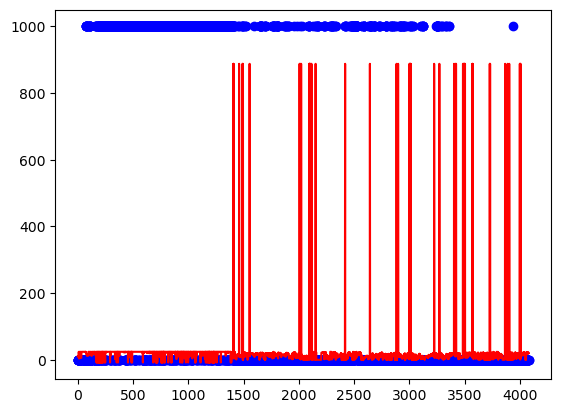

In [31]:
plt.plot(Hours_available_electricity.values, color='red')
plt.scatter(range(len(iron)), iron.values * 1000 , color='blue')
# plt.scatter(fan.values * 100, range(len(fan)), color='green')

In [27]:
plt.corr

[0. 0. 0. ... 0. 0. 0.]


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def calculate_correlation(df_, x_variable, y_variable):
        
    available_df =  df_[x_variable].isna() != True
    available_df = df_[available_df]
    available_df = available_df[available_df[y_variable].isna() != True]
    # Define the two variables to analyze

    # Compute the correlation coefficient
    corr, p_value=  pearsonr(available_df[x_variable], available_df[y_variable])
    return corr, p_value




In [52]:

calculate_correlation(df, "Hours_available_electricity", "Presence_fan")

(-0.011828196805813856, 0.45329788001387133)

In [71]:
print(f"| Driver | {' | '.join(i.replace('Presence_', '').capitalize() for i in PRESENCE_LIST)} |")
print("| ------ | --------- | ----------- | ------- |")

for driver in DRIVERS_LIST:
    s = "| " + driver + " | "
    no_corr = False
    for appliance in PRESENCE_LIST: 
        try:
            corr, p_value = calculate_correlation(df, driver, appliance)
            s += f" {corr:.5f},{p_value:.5f} |"
            # # print(f"{driver} vs {appliance} : {corr} | {p_value}")
            # print(f" | {driver} | {appliance} | {corr:.5f} | {p_value:.5f} |")
            
        except:
            # print(f"Failed to calculate {driver} vs {appliance}")
            no_corr = True
            break
        
    if no_corr:
        continue
    print(s)

| Driver | Refrigerator/freezer | Iron | Fan | Dvd_player | Radio/stereo | Phone_charger | Tv |
| ------ | --------- | ----------- | ------- |
| Years_of_HHH_in_community |      -0.05099 , 0.00003  |     -0.00169 , 0.89957  |     0.01944 , 0.10956  |     -0.05593 , 0.00000  |     -0.04366 , 0.00032  |     0.09681 , 0.00051  |     -0.12860 , 0.00000  |
| Dwelling_quality_index |      0.28909 , 0.00000  |     0.09960 , 0.00000  |     0.05166 , 0.00000  |     0.27668 , 0.00000  |     0.30396 , 0.00000  |     0.07354 , 0.00000  |     0.30104 , 0.00000  |
| Hours_available_electricity |      -0.02544 , 0.10672  |     -0.02439 , 0.12197  |     -0.01183 , 0.45330  |     -0.01849 , 0.24115  |     -0.02697 , 0.08722  |     -0.01750 , 0.51832  |     0.02652 , 0.32760  |
| Measurement_age |      -0.08798 , 0.00000  |     -0.10707 , 0.00000  |     -0.07462 , 0.00000  |     -0.06692 , 0.00001  |     -0.07904 , 0.00000  |     0.01405 , 0.56443  |     -0.03341 , 0.17046  |
| Monthly_expenditure |    